<a href="https://colab.research.google.com/github/SaidKaawach/ebuyer-scraper/blob/master/ceo_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #library required if the data to import is located on the drive
drive.mount('/content/drive') # Mount function of above library enables to read the data from drive

Mounted at /content/drive


In [ ]:
import pandas as pd  #imported for the reading the csv dataset
import numpy as np #import for mathematical operations
from sklearn.model_selection import train_test_split #imported for spliting the dataset
import matplotlib.pyplot as plt # imported for visualizing the results
from sklearn.metrics import classification_report # imported for creating the classification report

df = pd.read_csv("drive/MyDrive/senators.csv",encoding="ISO-8859-1") # importing Senator dataset

# Visualizing the data in Terms of classes distribution.


  Party                                              Tweet     Handle
0     D  On #MemorialDay, we salute all who have bravel...  AlmaAdams
1     D  On #MemorialDay, we remember the brave men and...  AlmaAdams
2     D  RT @shmetrolina: We are closed today, May 30th...  AlmaAdams
3     D  RT @NCDOT: All #NCDMV offices are closed today...  AlmaAdams
4     D  RT @TSUedu: Never forget <U+0001F499><U+0001F9...  AlmaAdams
The Total Number of Class: 2
The Samples Per class:
 D    640548
R    408027
Name: Party, dtype: int64
The Diagram Shows Below the histogram of class distribution.


array([[<AxesSubplot:title={'center':'Party_Numeric_Class'}>]],
      dtype=object)

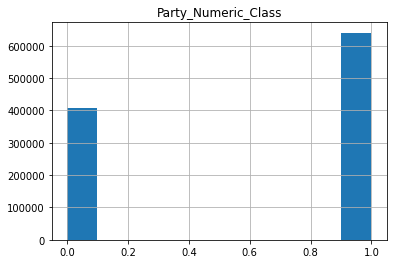

In [ ]:
print(df.head()) # Printing the head to see the data columns
print('The Total Number of Class: {}'.format(df['Party'].nunique()))
print('The Samples Per class:\n {}'.format(df['Party'].value_counts()))
print('The Diagram Shows Below the histogram of class distribution.')
df['Party_Numeric_Class'] = df.apply(lambda row : 1 if row['Party'] == 'D' else 0,axis=1)
df.hist(column='Party_Numeric_Class')


1    0.610875
0    0.389125
Name: Party_Numeric_Class, dtype: float64


<AxesSubplot:ylabel='Party_Numeric_Class'>

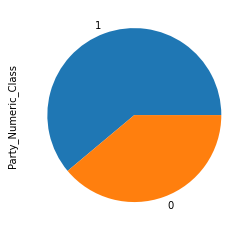

In [ ]:
print(df['Party_Numeric_Class'].value_counts()/df['Party_Numeric_Class'].value_counts().sum())
(df['Party_Numeric_Class'].value_counts()/df['Party_Numeric_Class'].value_counts().sum()).plot.pie()

### Above we check for class imbalance issue. We conclude that the dataset doesn't have class imbalance issue.


---


# From Below we take deeper look into the data. 

In [ ]:
print(df['Tweet'].head(15))

0     On #MemorialDay, we salute all who have bravel...
1     On #MemorialDay, we remember the brave men and...
2     RT @shmetrolina: We are closed today, May 30th...
3     RT @NCDOT: All #NCDMV offices are closed today...
4     RT @TSUedu: Never forget <U+0001F499><U+0001F9...
5     As Asian American and Pacific Islander Heritag...
6     From Team Adams:\r\n\r\nPlease join us in wish...
7     RT @LeaderHoyer: I spoke this week on the trag...
8     As we mourn the lives lost in Uvalde, we also ...
9     RT @RepDeborahRoss: Thoughts and prayers mea...
10    Unfortunately, #NC12 is all too familiar with ...
11    May is #MentalHealthAwarenessMonth  and now mo...
12    The House has already passed legislation to st...
13    I am so sorry to hear of Commissioner Scarboro...
14    I am heartbroken by the shooting at Robb Eleme...
Name: Tweet, dtype: object


Before we begin with training we would require to do two function:

1. Pre-process the data
- remove the stop words
- remove the punchuations
- and remove the numbers

---

this is deduced from the above output
2. We need to sample data into train and validation for the model training


In [ ]:
# Gensim Library Performs word2vec transformation and preprocessing of words
import gensim #a Python library for topic modeling, document indexing, and similarity retrieval
from gensim.models import KeyedVectors #KeyedVectors is a class that allows storing and operating on word vectors (e.g., Word2Vec, GloVe,etc.) in a more memory-efficient way
from gensim.parsing.preprocessing import remove_stopwords #examples of stopwords “a,” “the,” “is,” “are,”

# Parameters for preprocessing
no_tweets = 'All are used'     # no of tweets that will be read from file. All will be used
max_tweets_length = 200 # no of words per tweet.
max_words = 5000        # this is the size of the index (i.e. most common top words that will be used as features)

In [ ]:
import re


def remove_URL(Tweet):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", Tweet)


def remove_html(Tweet):
    html = re.compile(r"<.*?>") #HTML tags
    return html.sub(r"", Tweet)

def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # Miscellaneous symbols (e.g., dingbats ❒ or ❺)
        u"\U000024C2-\U0001F251"  # Enclosed characters (e.g., circled letters and numbers)
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

def clean_tweet(Tweet):
  Tweet = re.sub('RT', '', Tweet) #Remove Retweet from txt
  Tweet = re.sub('#[A-Za-z0-9]+', '', Tweet) #Remove # from txt
  Tweet = re.sub('\\n', '', Tweet) #Remove \n charachter
  Tweet = re.sub('@[\S]*', '', Tweet) #Remove mentions charachter
  Tweet = re.sub('^[\s]+|[\s]+$', '', Tweet) #Remove leading and trailing whitespaces from txt
  return Tweet

df["Tweet"] = df.Tweet.map(lambda x: remove_URL(x))
df["Tweet"] = df.Tweet.map(lambda x: remove_html(x))
df["Tweet"] = df.Tweet.map(lambda x: remove_emoji(x))
df["Tweet"] = df.Tweet.map(lambda x: clean_tweet(x))

In [ ]:
df.head()

,Party,Tweet,Handle,Party_Numeric_Class
0,D,"On , we salute all who have bravely served our...",AlmaAdams,1
1,D,"On , we remember the brave men and women who g...",AlmaAdams,1
2,D,"We are closed today, May 30th in observance of...",AlmaAdams,1
3,D,All offices are closed today for . \r\rOnline...,AlmaAdams,1
4,D,Never forget,AlmaAdams,1


In [ ]:
df['cleaned_txt']=df['Tweet']

In [ ]:
def remove_stopwords_punchuations (row,column_name):
    text = remove_stopwords(row[column_name]) # removes stop words
    # below function Removes punchuations, numbers, tailing spaces, all the words to lowercase
    texts = gensim.utils.simple_preprocess(text) # does some simple tokenisation (splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms)
    return texts

# axis=1 parameter indicates that the function should be applied row-wise. The processed text (list of tokens) is then assigned back to the 'Tweet' column of the  'df'
# below we remove all the unnecessary symbols / special characters from the text
column_name = 'Tweet'
df['Tweet'] = df.apply(remove_stopwords_punchuations,args=[column_name],axis=1) 

In [ ]:
df.head(100)

,Party,Tweet,Handle,Party_Numeric_Class,cleaned_txt
0,D,"[on, salute, bravely, served, country, amp, re...",AlmaAdams,1,"On , we salute all who have bravely served our..."
1,D,"[on, remember, brave, men, women, gave, lives,...",AlmaAdams,1,"On , we remember the brave men and women who g..."
2,D,"[we, closed, today, may, th, observance, memor...",AlmaAdams,1,"We are closed today, May 30th in observance of..."
3,D,"[all, offices, closed, today, online, services...",AlmaAdams,1,All offices are closed today for . \r\rOnline...
4,D,"[never, forget]",AlmaAdams,1,Never forget
...,...,...,...,...,...
95,D,"[campus, community, supporters, congresswoman,...",AlmaAdams,1,"Campus Community and Supporters, Congresswoman..."
96,D,"[thank, hospitality, honoring, fisk, universit...",AlmaAdams,1,Thank you for your hospitality and for honori...
97,D,"[congress, complicated, don, school, house, ro...",AlmaAdams,1,Congress can be complicated and since we dont...
98,D,"[the, debt, damn, high]",AlmaAdams,1,The debt is too damn high.


In [ ]:
from collections import Counter #imported to count the occurrances of each unique word in the corpus
 
def get_words_of_Tweets(row,column_name):
    max_count = 0 
    text = row[column_name]
    count = Counter()
    for word in text:
        count[word] += 1
    return len(count)
column_name = 'Tweet'
df['word_count'] = df.apply(get_words_of_Tweets,args=[column_name],axis=1)

print('Max Number of Words: {}'.format(df['word_count'].max()))
print('Average Number of Words accross Reviews: {}'.format(df['word_count'].mean()))
print('Most Common Length of Review: {}'.format(df['word_count'].mode()))
print('Total Number of example in our dataset before removing outliers: {}'.format(len(df)))

Max Number of Words: 61
Average Number of Words accross Reviews: 12.767880218391626
Most Common Length of Review: 0    10
dtype: int64
Total Number of example in our dataset before removing outliers: 1048575


In [ ]:
df.head(10) # View of pre-processed dataframe 'df'

,Party,Tweet,Handle,Party_Numeric_Class,cleaned_txt,word_count
0,D,"[on, salute, bravely, served, country, amp, re...",AlmaAdams,1,"On , we salute all who have bravely served our...",10
1,D,"[on, remember, brave, men, women, gave, lives,...",AlmaAdams,1,"On , we remember the brave men and women who g...",19
2,D,"[we, closed, today, may, th, observance, memor...",AlmaAdams,1,"We are closed today, May 30th in observance of...",12
3,D,"[all, offices, closed, today, online, services...",AlmaAdams,1,All offices are closed today for . \r\rOnline...,8
4,D,"[never, forget]",AlmaAdams,1,Never forget,2
5,D,"[as, asian, american, pacific, islander, herit...",AlmaAdams,1,As Asian American and Pacific Islander Heritag...,25
6,D,"[from, team, adams, please, join, wishing, hap...",AlmaAdams,1,From Team Adams:\r\rPlease join us in wishing ...,11
7,D,"[spoke, week, tragic, mass, shooting, robb, el...",AlmaAdams,1,I spoke this week on the tragic mass shooting ...,13
8,D,"[as, mourn, lives, lost, uvalde, remember, hon...",AlmaAdams,1,"As we mourn the lives lost in Uvalde, we also ...",23
9,D,"[thoughts, prayers, mean, don, follow, action,...",AlmaAdams,1,Thoughts and prayers mean nothing if we don...,13



Training Data

In [ ]:
# Training and pre-processing constants are listed below

embedding_size = 200    # size of embedding. size of 200 is a common choice, as it often provides a good balance between model complexity and representational power
validation_split = 0.2 # ratio of data for validation set
no_epochs = 50         # No of training cycles for the networks (small number of epochs might result in underfitted model, huge number might lead to overfitting)
lr = 0.01 # the learning rate determines how quickly the model's weights are updated during training. A smaller learning rate means slower convergence, but it might lead to a better solution (used to be 0.001) 

In [ ]:
from sklearn.utils import class_weight
# Used for class_weights shift in case of class imbalance data.

#Spliting the train/test with 80% dataset for training and 20% for testing

X = df["Tweet"] # getting reviws from the dataset for training
y = df.Party_Numeric_Class # getting ratings of the reviws

X_train, x_test, y_train, y_test = train_test_split(
     X, y, test_size=validation_split, random_state=42) #used for train test split
    #X_train: The input data for the training set
    #x_test: The input data for the test set
    #y_train: The corresponding labels for the training set
    #y_test: The corresponding labels for the test set


classes_weights  = class_weight.compute_class_weight(class_weight= 'balanced',classes=np.unique(y),y=y)

classes_weights_dict  = dict(enumerate(classes_weights))
print('We Calculate the class weights of dataset so that we can train our model well on lower number of classes \n {}'.format(type(classes_weights_dict)))
print(classes_weights_dict)

We Calculate the class weights of dataset so that we can train our model well on lower number of classes 
 <class 'dict'>
{0: 1.284933349998897, 1: 0.8184983795125423}


In [ ]:
# Only use tweets that are used for training

model = gensim.models.Word2Vec(
        X_train,
        size = embedding_size, # size of representation  old version of gensim has size = ...
        window = 5 ,              # length of frame for neighbours
                               # sg = 0 for CBOW, sg = 1 for skipgram.  default is 0
                               #iter = 5   no of epochs for w2v. default is 5
        min_count= 10 )         # min no of times for word occurs to be included

#this code snippet initializes a Word2Vec model using the Gensim library with the specified training data, embedding size, context window size, and minimum word frequency. 
#The model will learn word embeddings based on the co-occurrence of words in the training data.


In [ ]:
# using trained model to get index of words
index_to_key = model.wv.index2word

# Visualizing indexed words
for index, word in enumerate(index_to_key):
    if index == 10:
        break
    print(f"\tword {index} == {word}")
    #In summary, this code snippet extracts the indexed words from a trained Word2Vec model, iterates through the first 10 words in the list, and prints the index and the corresponding word for each. 
    #This is useful for visualizing the words in the vocabulary and their associated indices.

	word 0 == amp
	word 1 == the
	word 2 == today
	word 3 == we
	word 4 == it
	word 5 == this
	word 6 == house
	word 7 == act
	word 8 == people
	word 9 == president


In [ ]:
# Once we have the index_to_key, we can construct the word_index and also use it to code the sentences.
# the coded sentences are then made into a fixed size using pad_sequences

from tensorflow.keras.preprocessing.sequence import pad_sequences #is used for padding and truncating sequences of data. preprocessing techniques applied to sequences of variable length to make them all have the same length

word_index = {w: i+1 for i,w in enumerate(index_to_key) if i < max_words-1} # creates a dictionary called word_index that maps each word in the vocabulary (index_to_key) to an integer index max_words(zero is reserved for unknown) 


sequences_train = [[word_index.get(w, 0) for w in sent] for sent in X_train] # encode the sentences
sequences_test = [[word_index.get(w, 0) for w in sent] for sent in x_test] # encode the sentences

print(sequences_train[0])
# Applying padding to the encodings
seqs_truncated_train = pad_sequences(sequences_train, maxlen=max_tweets_length, padding="pre", truncating="post")
seqs_truncated_test = pad_sequences(sequences_test, maxlen=max_tweets_length, padding="pre", truncating="post")

print(seqs_truncated_train[0])
#this code  creates word sequences from the training and testing data, encodes them using a word-to-index dictionary, 
#and applies padding and truncation to ensure that all sequences have the same length, as required by many machine learning models.

[4, 37, 168, 0, 13, 1490, 22, 1, 158, 2678, 1507, 66, 54, 193, 146, 4, 37, 184, 926, 88, 895, 11, 2996, 1976]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0   

In [ ]:
# We apply below process becasuse tensorflow requires the data in categorical format for multiclass classification

from tensorflow.keras.utils import to_categorical
print(y_train.unique()) 
print(y_test.unique()) 
y_train_ca = to_categorical(y_train)
y_test_ca = to_categorical(y_test)
print(y_train_ca)

[1 0]
[1 0]
[[0. 1.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [0. 1.]]


#Recap
### Till now we have successfully 
1. visualized the data
2. Removed stopwords
3. Removed spaces
4. Removed punchuations
5. Removed urls and htmls
6. removed emojis
7. Removed Numbers
8. Removed Special Characters
9. Converted all the text to lowercase
10. Weight dictionary for class balancing
11. Train val Split of the dataset 
12. Converted the classes to categorical formation


---

# Now we step towards training


# Training With Glove Embeddings

In [ ]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
  
  vocab_size = len(word_index) + 1  
  
  embedding_matrix = np.zeros((vocab_size, embedding_dim))

  with open(filepath) as f:
    for line in f:
      word, *vector = line.split()
      if word in word_index:
        idx = word_index.get(word)
        vector = np.array(vector, dtype=np.float32)[:embedding_dim]
        embedding_matrix[idx,:] = vector
  return embedding_matrix

In [ ]:
# Loading pre-trained embeddings from the glove file
path_to_glove_file = "drive/MyDrive/glove.6B.200d.txt"
# Getting the embeddings matrix for our words in the word_index
embedding_matrix = create_embedding_matrix(path_to_glove_file,
                                            word_index,
                                            embedding_size)

In [ ]:
# fix random seed for reproducibility
np.random.seed(66542)

import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint # Saving Model on Certain Criteria of improving
from tensorflow.keras.optimizers import Adam # The model optimizer  popular and effective optimization algorithm for training deep learning models
save_path = 'drive/MyDrive/ceoNN/models/' 
model_save_name = 'saved_training_with_Glove' + ".h5"
checkpoint_glove = ModelCheckpoint(save_path + model_save_name, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
def scheduler(epoch, lr):
   if epoch < 10:
     return lr
   elif epoch > 30:
     return lr
   elif (epoch % 10 == 0):
     return lr * tf.math.exp(-0.1)
   else:
     return lr
    

learning_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler) # applying adaptive learning rate to the model.

adam = Adam(learning_rate=lr) # To change the learning rate

callbacks = [checkpoint_glove,learning_schedule]
#this code sets up the necessary configurations for training a neural network using TensorFlow and Keras, 
#including saving the best model, applying a custom learning rate schedule, and using the Adam optimizer


In [ ]:
from tensorflow.keras.models import Sequential
import keras
from tensorflow.keras.layers import Conv1D,GlobalMaxPooling1D,Dense,Dropout,Activation,Embedding
vocab_size = len(word_index) + 1
#defines a Keras Sequential model for a text classification task. 
#The model consists of an embedding layer followed by a 1D convolutional layer, a global max pooling layer, two dense layers, and dropout and activation layers. 
#Let's break down each layer
model_c = Sequential()
# Embedding Matrix initialize the weights on the input layer
model_c.add(Embedding(vocab_size, embedding_size, embeddings_initializer=keras.initializers.Constant(embedding_matrix), input_length=embedding_size))
model_c.add(Conv1D(150,3,padding = 'valid' , activation = 'relu',strides = 1 , input_shape = (max_words,embedding_size))) 
model_c.add(GlobalMaxPooling1D())
model_c.add(Dense(60)) # (Dense layer can be increased or decreased)
model_c.add(Dropout(0.8)) # Dropout rate added to avoid overfitting (Can be experimented)
model_c.add(Activation('relu'))
model_c.add(Dense(2)) # Dense Two is equal to number of classes
model_c.add(Activation('softmax'))

model_c.compile(loss = 'binary_crossentropy',optimizer = adam , metrics = ['accuracy'])
print(model_c.summary())
#Layers: The model has 9 layers (1 Embedding, 1 Conv1D, 1 GlobalMaxPooling1D, 2 Dense, 1 Dropout, and 3 Activation layers).
#Outputs: The model outputs a probability distribution over two classes, which is represented as a dense vector of size 2.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 200)          1000000   
                                                                 
 conv1d (Conv1D)             (None, 198, 150)          90150     
                                                                 
 global_max_pooling1d (Globa  (None, 150)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 60)                9060      
                                                                 
 dropout (Dropout)           (None, 60)                0         
                                                                 
 activation (Activation)     (None, 60)                0         
                                                        

In [ ]:
#start Model Traning by using model.fit
history_c = model_c.fit(seqs_truncated_train, y_train_ca,
                        batch_size = 512,epochs = 30,
                        validation_data = (seqs_truncated_test,y_test_ca),
                        callbacks=[checkpoint_glove],class_weight=classes_weights_dict)

Epoch 1/30
1639/1639 [==============================] - ETA: 0s - loss: 0.5419 - accuracy: 0.7243
Epoch 1: val_accuracy improved from -inf to 0.74765, saving model to drive/MyDrive/ceoNN/models/saved_training_with_Glove.h5
1639/1639 [==============================] - 83s 51ms/step - loss: 0.5419 - accuracy: 0.7243 - val_loss: 0.4947 - val_accuracy: 0.7476
Epoch 2/30
1639/1639 [==============================] - ETA: 0s - loss: 0.4993 - accuracy: 0.7526
Epoch 2: val_accuracy improved from 0.74765 to 0.75488, saving model to drive/MyDrive/ceoNN/models/saved_training_with_Glove.h5
1639/1639 [==============================] - 70s 42ms/step - loss: 0.4993 - accuracy: 0.7526 - val_loss: 0.4833 - val_accuracy: 0.7549
Epoch 3/30
1639/1639 [==============================] - ETA: 0s - loss: 0.4725 - accuracy: 0.7703
Epoch 3: val_accuracy improved from 0.75488 to 0.76325, saving model to drive/MyDrive/ceoNN/models/saved_training_with_Glove.h5
1639/1639 [==============================] - 69s 42ms/s

In [ ]:
print('Training Accuracy : {}'.format(history_c.history['accuracy'][-1]))
print('Validation Accuracy : {}'.format(history_c.history['val_accuracy'][-1]))

scores = model_c.evaluate(seqs_truncated_test, y_test_ca, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))


Training Accuracy : 0.9077045321464539
Validation Accuracy : 0.749316930770874
6554/6554 [==============================] - 26s 4ms/step - loss: 1.3761 - accuracy: 0.7493
Accuracy: 74.93%


In [ ]:
# Results withut glove using word to vec
results_with_glove = model_c.predict(seqs_truncated_test) # Finding Predicted Score over validatoin data
results_class_wg = np.array(np.argmax(results_with_glove,axis=1),dtype=int) # Finding the class of each review in validation
print(results_class_wg)

6554/6554 [==============================] - 40s 6ms/step
[1 0 0 ... 1 0 1]


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print('Results with Glove')
# average is using with argumented weighted in case of multiclass classification
res_f1 = f1_score(y_test,results_class_wg,average='weighted')
print('F1 Score: {} '.format(res_f1))
res_rc = recall_score(y_test,results_class_wg,average='weighted')
print('Recall Score: {}'.format(res_rc))
res_prec = precision_score(y_test,results_class_wg,average='weighted')
print('Precision Score: {}'.format(res_prec))

Results with Glove
F1 Score: 0.7521762774016449 
Recall Score: 0.7493169301194478
Precision Score: 0.7633617820068971


# We create Confusion matrix now

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    y_true_for_class = np.array(y_true,dtype=int)
    y_pred_for_class = np.array(y_pred,dtype=int)
    #classes = classes[unique_labels(y_true_for_class, y_pred_for_class)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.()
    plt.savefig(file_path+ title+'.png')
    return ax

Confusion matrix, without normalization
[[62929 18447]
 [34125 94214]]


<AxesSubplot:title={'center':'Confusion Matrix With Glove'}, xlabel='Predicted label', ylabel='True label'>

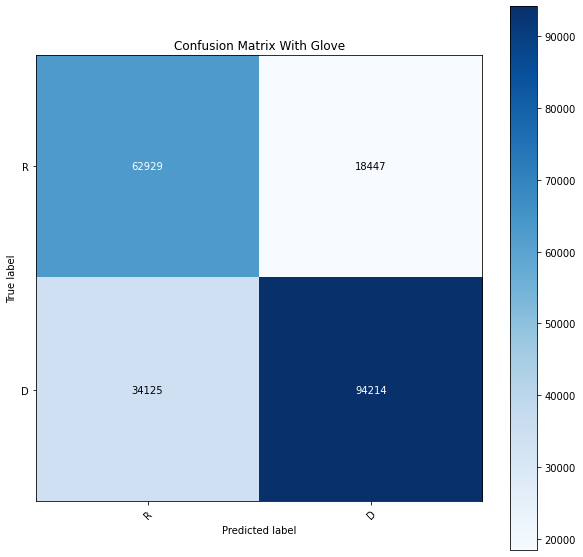

In [ ]:
file_path = 'drive/MyDrive/ceoNN/results/'
class_labels = ['R' , 'D']
plot_confusion_matrix(y_test.astype(str),
                      results_class_wg.astype(str),classes=class_labels,
                      title='Confusion Matrix With Glove')

# Testing On CEO DATASET

In [ ]:
# if the model is already trained we can use below function to load the weights from saved model file. 
model_c.load_weights('drive/MyDrive/ceoNN/models/saved_training_with_Glove.h5')

In [ ]:
# Load the CEO Data for the predictions
df_ceo = pd.read_csv('/content/drive/MyDrive/ceo.csv')
print(df_ceo.head(15))

     username                   id                 date  \
0   @tim_cook  1200060640469159939  2019-11-28 14:35:27   
1   @tim_cook  1200047686180835328  2019-11-28 13:43:58   
2   @tim_cook  1199872990718169089  2019-11-28 02:09:48   
3   @tim_cook  1199855397617704970  2019-11-28 00:59:53   
4   @tim_cook  1199767313890922497  2019-11-27 19:09:52   
5   @tim_cook  1197141315064086530  2019-11-20 13:15:05   
6   @tim_cook  1196927442906013696  2019-11-19 23:05:14   
7   @tim_cook  1196914279967903744  2019-11-19 22:12:56   
8   @tim_cook  1195833226972913664  2019-11-16 22:37:13   
9   @tim_cook  1195399185815572480  2019-11-15 17:52:29   
10  @tim_cook  1195073339393314818  2019-11-14 20:17:42   
11  @tim_cook  1194985641148182528  2019-11-14 14:29:13   
12  @tim_cook  1194614812195442688  2019-11-13 13:55:40   
13  @tim_cook  1194607635590332416  2019-11-13 13:27:09   
14  @tim_cook  1193879150357925889  2019-11-11 13:12:25   

                                                tweet  

In [ ]:
# Pre-processing the text
column_name = 'tweet'
df_ceo['pre_processed_tweet'] = df_ceo.apply(remove_stopwords_punchuations,args=[column_name],axis=1) 

In [ ]:
df_ceo.head(15)

,username,id,date,tweet,retweets,likes,pre_processed_tweet
0,@tim_cook,1200060640469159939,2019-11-28 14:35:27,"On this #Thanksgiving, I am reflecting on the ...",546,4434,"[on, thanksgiving, reflecting, dreamers, as, e..."
1,@tim_cook,1200047686180835328,2019-11-28 13:43:58,Wishing everyone a #HappyThanksgiving filled w...,575,6097,"[wishing, filled, joy, amp, happiness, reflect..."
2,@tim_cook,1199872990718169089,2019-11-28 02:09:48,Tomorrow the incredible @MNightShyamalan’s ser...,412,2607,"[tomorrow, incredible, mnightshyamalan, series..."
3,@tim_cook,1199855397617704970,2019-11-28 00:59:53,Thanksgiving Day challenge! Close your rings w...,394,3932,"[thanksgiving, day, challenge, close, rings, f..."
4,@tim_cook,1199767313890922497,2019-11-27 19:09:52,As many of you travel to be with loved ones to...,1310,8436,"[as, travel, loved, ones, today, remember, pre..."
5,@tim_cook,1197141315064086530,2019-11-20 13:15:05,The construction of our new Austin campus is u...,3804,23155,"[the, construction, new, austin, campus, under..."
6,@tim_cook,1196927442906013696,2019-11-19 23:05:14,It’s incredible to see how Salesforce and thei...,611,4750,"[it, incredible, salesforce, passionate, devel..."
7,@tim_cook,1196914279967903744,2019-11-19 22:12:56,Love this look at Chicago through the eyes of ...,200,2185,"[love, look, chicago, eyes, students, drw, col..."
8,@tim_cook,1195833226972913664,2019-11-16 22:37:13,We’re proud to team up with @TSUedu and @nc100...,219,1866,"[we, re, proud, team, tsuedu, nc, bwinc, girls..."
9,@tim_cook,1195399185815572480,2019-11-15 17:52:29,“The innovation of Night mode is incredible! I...,757,6827,"[the, innovation, night, mode, incredible, it,..."


In [ ]:
#Preparing test CEO data to be feed into the model.
from tensorflow.keras.preprocessing.sequence import pad_sequences


sequences_test_ceo = [[word_index.get(w, 0) for w in sent] for sent in df_ceo['pre_processed_tweet']] # Encode the sentences ceo dataset

#Checking the encoding by printing it.
print('Before padding encodings')
print(sequences_test_ceo[0])

print('After padding encodings')
seqs_truncated_ceo = pad_sequences(sequences_test_ceo, maxlen=max_tweets_length, padding="pre", truncating="post")
print(seqs_truncated_train[0]) 

Before padding encodings
[85, 1735, 0, 1468, 54, 1199, 23, 300, 63, 1185, 1769, 372, 249, 0, 0]
After padding encodings
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0   

In [ ]:
#making Prediction on the test data CEO
test_ceo_results = model_c.predict(seqs_truncated_ceo)
print('Prediction On the CEO Dataset')
print(test_ceo_results[0:10,:])

1823/1823 [==============================] - 4s 2ms/step
Prediction On the CEO Dataset
[[2.7672490e-06 9.9999726e-01]
 [3.8216636e-01 6.1783367e-01]
 [9.9997330e-01 2.6653684e-05]
 [5.5915332e-01 4.4084668e-01]
 [9.6569055e-01 3.4309506e-02]
 [1.6408367e-03 9.9835914e-01]
 [4.6936738e-01 5.3063256e-01]
 [2.1285759e-03 9.9787140e-01]
 [7.0226152e-04 9.9929774e-01]
 [4.8708910e-01 5.1291090e-01]]


In [ ]:
#Class predict on argmax, having maxium probability of two classes
classes_predicted_on_ceo = np.argmax(test_ceo_results,axis=1)
print('Predicted Classes')
print(classes_predicted_on_ceo[:10])

Predicted Classes
[1 1 0 0 0 1 1 1 1 1]


In [ ]:

df_ceo['Class Probabilites'] = list(test_ceo_results)
df_ceo['Predicted Classes'] = list(classes_predicted_on_ceo)

# Text 2 Emotion Part Starts From Below

In [ ]:
#For Text to Emotion Library Installation Phase on Colab
!pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=6ccd06d12733b25ea85c20930bdc624a1f63da20a29862a5606f409e4edcda92
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
test_df_ceo = df_ceo.head(100)

In [ ]:
import text2emotion as te
from tqdm import tqdm

tqdm.pandas()
list_of_columns = ['Happy','Angry','Surprise', 'Sad', 'Fear']
# Taking alot of time processing each tweet.
list_of_emotion_scores = []
def get_emotions_of_tweet(row,column_name):
  tweet = row[column_name]
  emotions_probability =  te.get_emotion(str(tweet))
  
  #emotion_predicted = max(emotions_probability, key=emotions_probability.get)
  
  list_of_emotion_scores.append([emotions_probability['Happy'] , emotions_probability['Angry'] ,emotions_probability['Surprise'],emotions_probability['Sad'] , emotions_probability['Fear']])
  
  

column_name ='tweet'
df_ceo.progress_apply(get_emotions_of_tweet,args=[column_name],axis=1)


  0%|          | 1/58313 [00:00<33:25, 29.08it/s]


AttributeError: ignored

In [ ]:
list_to_df_ceo = pd.DataFrame(list_of_emotion_scores,columns= list_of_columns)
print(list_to_df_ceo.head())
df_ceo = pd.concat([df_ceo, list_to_df_ceo], axis=1)
df_ceo.to_csv('/content/drive/MyDrive/ceoNN/CEO_Predicted.csv')

Empty DataFrame
Columns: [Happy, Angry, Surprise, Sad, Fear]
Index: []


In [ ]:

df_ceo.head(1000)

,username,id,date,tweet,retweets,likes,pre_processed_tweet,Class Probabilites,Predicted Classes
0,@tim_cook,1200060640469159939,2019-11-28 14:35:27,"On this #Thanksgiving, I am reflecting on the ...",546,4434,"[on, thanksgiving, reflecting, dreamers, as, e...","[2.767249e-06, 0.99999726]",1
1,@tim_cook,1200047686180835328,2019-11-28 13:43:58,Wishing everyone a #HappyThanksgiving filled w...,575,6097,"[wishing, filled, joy, amp, happiness, reflect...","[0.38216636, 0.6178337]",1
2,@tim_cook,1199872990718169089,2019-11-28 02:09:48,Tomorrow the incredible @MNightShyamalan’s ser...,412,2607,"[tomorrow, incredible, mnightshyamalan, series...","[0.9999733, 2.6653684e-05]",0
3,@tim_cook,1199855397617704970,2019-11-28 00:59:53,Thanksgiving Day challenge! Close your rings w...,394,3932,"[thanksgiving, day, challenge, close, rings, f...","[0.5591533, 0.44084668]",0
4,@tim_cook,1199767313890922497,2019-11-27 19:09:52,As many of you travel to be with loved ones to...,1310,8436,"[as, travel, loved, ones, today, remember, pre...","[0.96569055, 0.034309506]",0
...,...,...,...,...,...,...,...,...,...
995,@BillGates,1150605518291001345,2019-07-15 03:18:27,I recently wrote about how people with tech sk...,1455,7274,"[recently, wrote, people, tech, skills, fascin...","[0.05400344, 0.9459965]",1
996,@BillGates,1149722840847015942,2019-07-12 16:51:00,“Fathers who help unlock their daughter’s pote...,3610,19731,"[fathers, help, unlock, daughter, potential, s...","[0.49056494, 0.50943506]",1
997,@BillGates,1149446129945366528,2019-07-11 22:31:27,Nearly one billion malaria cases have been pre...,789,4832,"[nearly, billion, malaria, cases, prevented, i...","[0.59973973, 0.40026024]",0
998,@BillGates,1148674683883151360,2019-07-09 19:26:00,Can we feed 10 billion people? I’m optimistic ...,1798,9797,"[can, feed, billion, people, optimistic, inves...","[0.19483748, 0.8051625]",1


In [ ]:
ceo_predicted = pd.read_csv('/content/drive/MyDrive/ceoNN/CEO_Predicted.csv')


In [ ]:
dataframe_predicted_probabilities = pd.DataFrame(test_ceo_results,columns=['Republican', 'Democrate'])

In [ ]:
dataframe_ceo_predicted = pd.concat([ceo_predicted, dataframe_predicted_probabilities], axis=1)
dataframe_ceo_predicted.to_csv('/content/drive/MyDrive/ceoNN/CEO_Predicted_v1.csv')

In [ ]:
dataframe_ceo_predicted.head(19)

,Unnamed: 0,username,id,date,tweet,retweets,likes,pre_processed_tweet,Class Probabilites,Predicted Classes,Happy,Angry,Surprise,Sad,Fear,Republican,Democrate
0,0,@tim_cook,1200060640469159939,2019-11-28 14:35:27,"On this #Thanksgiving, I am reflecting on the ...",546,4434,"['on', 'thanksgiving', 'reflecting', 'dreamers...",[2.7672490e-06 9.9999726e-01],1,NaN,NaN,NaN,NaN,NaN,0.000003,0.999997
1,1,@tim_cook,1200047686180835328,2019-11-28 13:43:58,Wishing everyone a #HappyThanksgiving filled w...,575,6097,"['wishing', 'filled', 'joy', 'amp', 'happiness...",[0.38216636 0.6178337 ],1,NaN,NaN,NaN,NaN,NaN,0.382166,0.617834
2,2,@tim_cook,1199872990718169089,2019-11-28 02:09:48,Tomorrow the incredible @MNightShyamalan’s ser...,412,2607,"['tomorrow', 'incredible', 'mnightshyamalan', ...",[9.9997330e-01 2.6653684e-05],0,NaN,NaN,NaN,NaN,NaN,0.999973,0.000027
3,3,@tim_cook,1199855397617704970,2019-11-28 00:59:53,Thanksgiving Day challenge! Close your rings w...,394,3932,"['thanksgiving', 'day', 'challenge', 'close', ...",[0.5591533 0.44084668],0,NaN,NaN,NaN,NaN,NaN,0.559153,0.440847
4,4,@tim_cook,1199767313890922497,2019-11-27 19:09:52,As many of you travel to be with loved ones to...,1310,8436,"['as', 'travel', 'loved', 'ones', 'today', 're...",[0.96569055 0.03430951],0,NaN,NaN,NaN,NaN,NaN,0.965691,0.034310
5,5,@tim_cook,1197141315064086530,2019-11-20 13:15:05,The construction of our new Austin campus is u...,3804,23155,"['the', 'construction', 'new', 'austin', 'camp...",[0.00164084 0.99835914],1,NaN,NaN,NaN,NaN,NaN,0.001641,0.998359
6,6,@tim_cook,1196927442906013696,2019-11-19 23:05:14,It’s incredible to see how Salesforce and thei...,611,4750,"['it', 'incredible', 'salesforce', 'passionate...",[0.46936738 0.53063256],1,NaN,NaN,NaN,NaN,NaN,0.469367,0.530633
7,7,@tim_cook,1196914279967903744,2019-11-19 22:12:56,Love this look at Chicago through the eyes of ...,200,2185,"['love', 'look', 'chicago', 'eyes', 'students'...",[0.00212858 0.9978714 ],1,NaN,NaN,NaN,NaN,NaN,0.002129,0.997871
8,8,@tim_cook,1195833226972913664,2019-11-16 22:37:13,We’re proud to team up with @TSUedu and @nc100...,219,1866,"['we', 're', 'proud', 'team', 'tsuedu', 'nc', ...",[7.0226152e-04 9.9929774e-01],1,NaN,NaN,NaN,NaN,NaN,0.000702,0.999298
9,9,@tim_cook,1195399185815572480,2019-11-15 17:52:29,“The innovation of Night mode is incredible! I...,757,6827,"['the', 'innovation', 'night', 'mode', 'incred...",[0.4870891 0.5129109],1,NaN,NaN,NaN,NaN,NaN,0.487089,0.512911
